<a href="https://colab.research.google.com/github/Audrey-ai/New-York-City-Housing-Prediction/blob/main/Copy_of_Analysis600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Loading the lars package
install.packages("lars")
library(lars)

#Loading and checking the New York Housing data
Housing <- read.csv('NewYorkHousing.csv')

#Checking the top records of the data
head(Housing)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT..MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,0.01381,80,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,2.97,50.0,1
2,0.02055,85,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77,24.7,0
3,0.02055,85,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77,24.7,0
4,0.01501,90,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,3.16,50.0,1
5,0.01311,90,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81,35.4,1
6,0.02899,40,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,5.89,26.6,0


In [53]:
#Loading the glmnet package

install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [77]:
#Selecting MEDV variable as the dependent variable(y)
y <- Housing$MEDV
head(y)

[1] 50.0 24.7 24.7 50.0 35.4 26.6

In [80]:
#Dependent and independent variables selection

#Selecting MEDV variable as the dependent variable(y)
#y <- Housing$MEDV
#head(y)

#Selecting the first 12 variables as the independent variable(x)
x <- Housing[,1:12]
head(x)

#Assigning matrix format to the variables in x

x <- data.matrix(x)
head(x)


CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0.01381,80,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,2.97
0.02055,85,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77
0.02055,85,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77
0.01501,90,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,3.16
0.01311,90,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81
0.02899,40,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,5.89


In [60]:
#Assigning matrix format to the variable x

x <- data.matrix(x)
head(x)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0.01381,80,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,2.97
0.02055,85,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77
0.02055,85,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77
0.01501,90,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,3.16
0.01311,90,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81
0.02899,40,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,5.89


Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"data" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"data" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"data" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"data" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"data" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"data" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"data" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"data" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"d

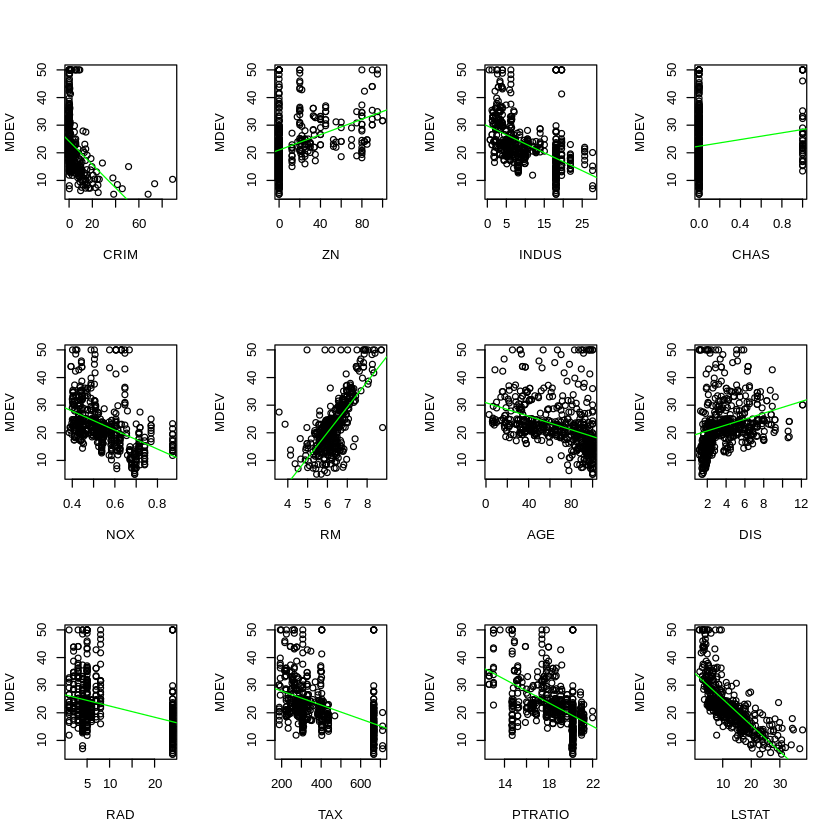

In [69]:
#Scatterplots with the line of best fit for all the predictors in x with y on the vertical axis

par(mfrow=c(3,4))
for(i in 1:12)
  {
  plot(x[,i], y, xlab = colnames(x)[i], ylab="MDEV")
  abline(lm(y~(x)[,i]), data=Housing, col="green")
}

In [70]:
#Regressing y on the predictors in x using OLS (Ordinary Least Square Regression)

ols_model <- lm(y ~ x)
summary(ols_model)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6712  -2.6087  -0.6046   1.8305  26.6318 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.320202   4.618267   8.298 8.66e-16 ***
xCRIM        -0.119822   0.032047  -3.739 0.000205 ***
xZN           0.045729   0.012766   3.582 0.000372 ***
xINDUS        0.006623   0.059072   0.112 0.910768    
xCHAS         2.863919   0.847066   3.381 0.000775 ***
xNOX        -17.194384   3.628135  -4.739 2.75e-06 ***
xRM           3.839763   0.401772   9.557  < 2e-16 ***
xAGE          0.002268   0.012512   0.181 0.856225    
xDIS         -1.422983   0.182374  -7.803 3.20e-14 ***
xRAD          0.280372   0.062873   4.459 1.00e-05 ***
xTAX         -0.012604   0.003522  -3.579 0.000377 ***
xPTRATIO     -0.871191   0.123173  -7.073 4.76e-12 ***
xLSTAT       -0.547822   0.048897 -11.204  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standar

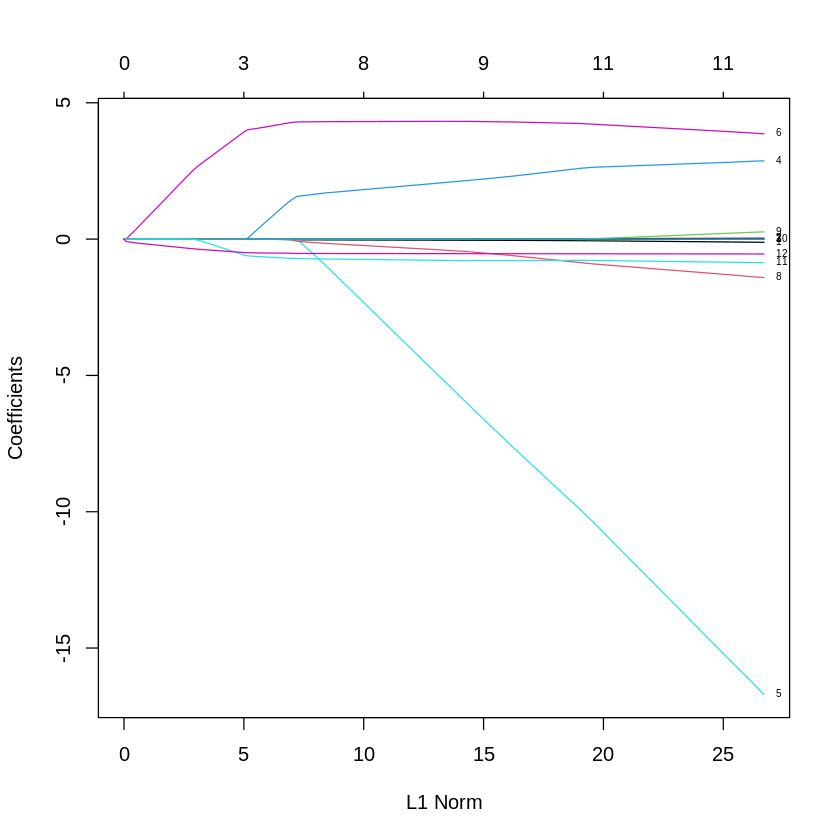

In [71]:
#Using the glmnet function to plot the path of each of 
#x’s variable coefficients against the L1 norm of the beta vector

lasso_model <- glmnet(x, y)
plot(lasso_model, xvar = "norm", label = TRUE)

#This graph indicates at which stage each coefficient shrinks to zero

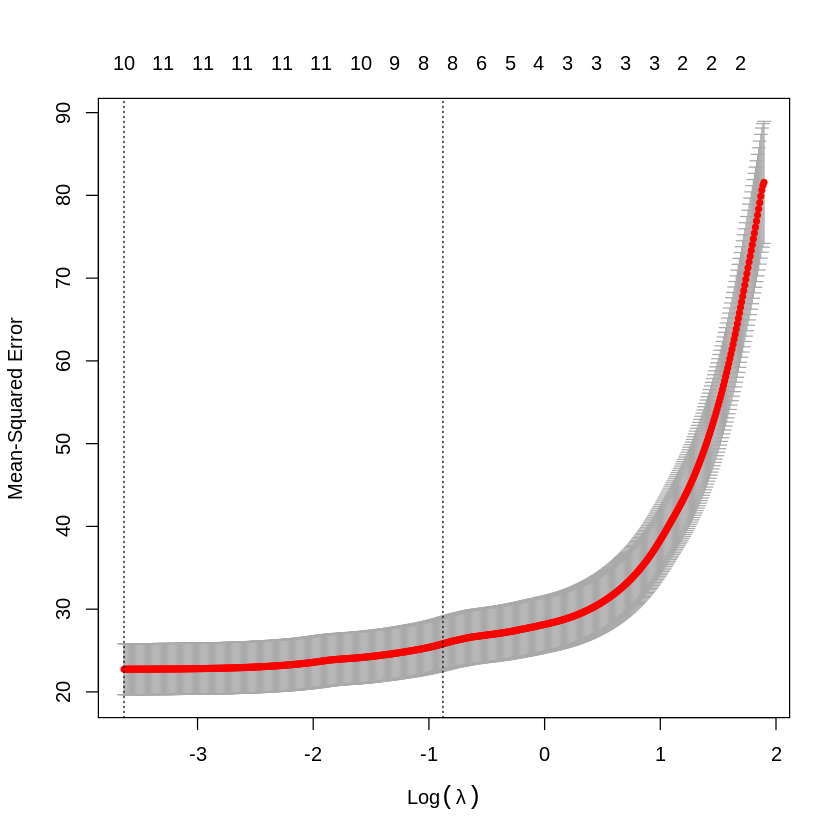

In [72]:
#Using the cv.glmnet function to get the cross validation curve 
#and the value of lambda that minimizes the mean cross validation error

cv_fit <- cv.glmnet(x, y, alpha = 1, nlambda = 1000)

plot(cv_fit)

In [73]:
#Finding the minimum mean cross-validated error
cv_fit$lambda.min

#The exact value of lambda is 0.03

[1] 0.02637153

In [74]:
#Using the minimum value of lambda from the previous exercise to get the estimated beta matrix

fit <- glmnet(x, y, alpha = 1, lambda=cv_fit$lambda.min)
fit$beta

12 x 1 sparse Matrix of class "dgCMatrix"
                  s0
CRIM     -0.10998358
ZN        0.04127030
INDUS     .         
CHAS      2.83899474
NOX     -15.87855993
RM        3.91493203
AGE       .         
DIS      -1.34845699
RAD       0.23375408
TAX      -0.01056694
PTRATIO  -0.85398399
LSTAT    -0.54360401

In [75]:
#To get a more parsimonious model we can use a higher value of lambda that is within one standard error of the minimum
#Using this value of lambda to get the beta coefficients Noting that more coefficients are now shrunk to zero
#Finding the lambda.1se value

cv_fit$lambda.1se

[1] 0.4152719

In [76]:
#getting beta coefficients using the lambda.1se value

fit <- glmnet(x, y, alpha = 1, lambda=cv_fit$lambda.1se)
fit$beta

12 x 1 sparse Matrix of class "dgCMatrix"
                   s0
CRIM    -0.0319132903
ZN       .           
INDUS    .           
CHAS     1.7983570720
NOX     -2.1840077545
RM       4.3061059038
AGE      .           
DIS     -0.2280626582
RAD      .           
TAX     -0.0005358855
PTRATIO -0.7439656931
LSTAT   -0.5309534318